# 第八章 图像处理

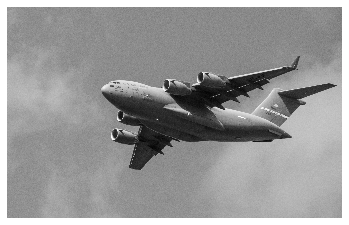

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread("images/plane.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap="gray"), plt.axis("off")
plt.show()

In [8]:
type(image)

numpy.ndarray

In [7]:
image

array([[140, 136, 146, ..., 132, 139, 134],
       [144, 136, 149, ..., 142, 124, 126],
       [152, 139, 144, ..., 121, 127, 134],
       ...,
       [156, 146, 144, ..., 157, 154, 151],
       [146, 150, 147, ..., 156, 158, 157],
       [143, 138, 147, ..., 156, 157, 157]], dtype=uint8)

In [9]:
image.shape

(2270, 3600)

In [10]:
image[0,0]

140

In [15]:
image_bgr = cv2.imread("images/plane.jpg",cv2.IMREAD_COLOR)

image_bgr[0,0]

array([195, 144, 111], dtype=uint8)

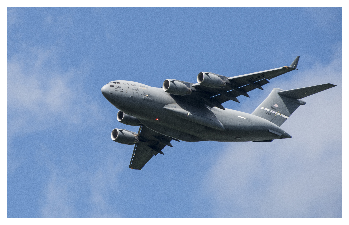

In [18]:
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb), plt.axis("off")
plt.show()

In [35]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread("images/plane.jpg", cv2.IMREAD_GRAYSCALE)

cv2.imwrite("images/plane_new.jpg",image)

True

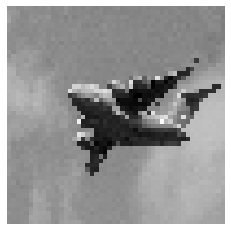

In [39]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread("images/plane.jpg", cv2.IMREAD_GRAYSCALE)

image_50x50 = cv2.resize(image,(50,50))

plt.imshow(image_50x50,cmap="gray"),plt.axis("off")
plt.show()

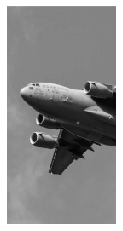

In [46]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread("images/plane_256x256.jpg",cv2.IMREAD_GRAYSCALE)

image.shape

image_cropped = image[:,:128]

plt.imshow(image_cropped,cmap="gray"),plt.axis("off")
plt.show()

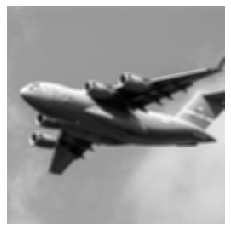

In [51]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread("images/plane_256x256.jpg",cv2.IMREAD_GRAYSCALE)

image_blurry = cv2.blur(image,(5,5))

plt.imshow(image_blurry,cmap="gray"), plt.axis("off")
plt.show()

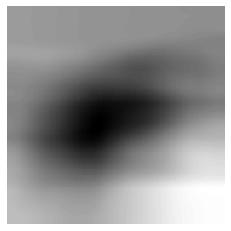

In [57]:
image_very_blurry = cv2.blur(image,(100,100))

plt.imshow(image_very_blurry,cmap="gray"), plt.axis("off")
plt.show()

In [67]:
kernel = np.ones((5,5)) /25.0

kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

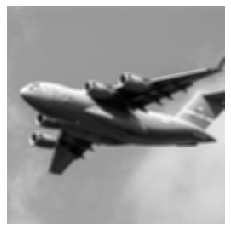

In [73]:
image_kernel = cv2.filter2D(image,-1,kernel)

plt.imshow(image_kernel, cmap="gray"),plt.axis("off")
plt.show()

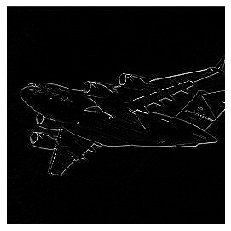

In [74]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread("images/plane_256x256.jpg",cv2.IMREAD_GRAYSCALE)

kernel = np.array([[0, -2, 0],
                  [-1, 5, -1],
                  [0, -1, 0]])

image_sharp = cv2.filter2D(image, -1, kernel)

plt.imshow(image_sharp, cmap="gray"), plt.axis("off")
plt.show()

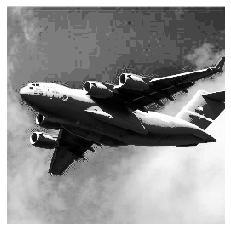

In [77]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread("images/plane_256x256.jpg",cv2.IMREAD_GRAYSCALE)

image_enhanced = cv2.equalizeHist(image)

plt.imshow(image_enhanced, cmap="gray"), plt.axis("off")
plt.show()

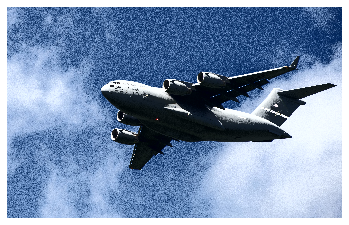

In [78]:
image_bgr = cv2.imread("images/plane.jpg")

image_yuv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2YUV)

image_yuv[:,:,0] = cv2.equalizeHist(image_yuv[:,:,0])

image_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)

plt.imshow(image_rgb), plt.axis("off")
plt.show()

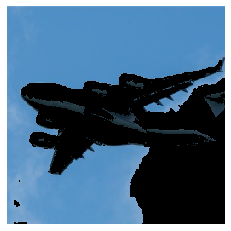

In [84]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image_bgr = cv2.imread("images/plane_256x256.jpg")

image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)

# 定义HSV格式中蓝色分量的区间
lower_blue = np.array([50,100,50])
upper_blue = np.array([130,255,255])

mask = cv2.inRange(image_hsv, lower_blue, upper_blue)

image_bgr_masked = cv2.bitwise_and(image_bgr, image_bgr, mask=mask)

image_rgb = cv2.cvtColor(image_bgr_masked,cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb), plt.axis("off")
plt.show()

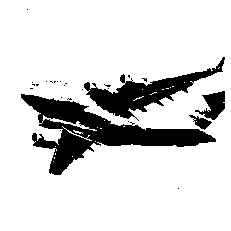

In [89]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image_grey = cv2.imread("images/plane_256x256.jpg",cv2.IMREAD_GRAYSCALE)

max_output_value = 255
neighborhood_size = 99
substract_from_mean = 10
image_binarized = cv2.adaptiveThreshold(image_grey,
                                        max_output_value,
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY,
                                        neighborhood_size,
                                        substract_from_mean)

plt.imshow(image_binarized,cmap="gray"), plt.axis("off")
plt.show()

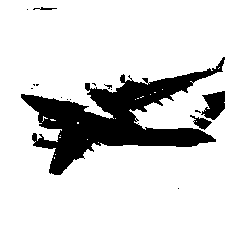

In [90]:
max_output_value = 255
neighborhood_size = 99
substract_from_mean = 10
image_binarized = cv2.adaptiveThreshold(image_grey,
                                        max_output_value,
                                        cv2.ADAPTIVE_THRESH_MEAN_C,
                                        cv2.THRESH_BINARY,
                                        neighborhood_size,
                                        substract_from_mean)

plt.imshow(image_binarized,cmap="gray"), plt.axis("off")
plt.show()

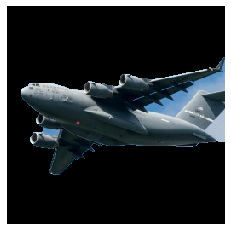

In [105]:
# 加载库
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 加载图像，并将其转换为RGB格式
image_bgr = cv2.imread("images/plane_256x256.jpg")
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# 矩形的值，左上角的x坐标，左上角的y坐标，宽，高
rectangle = (0,56,256,150)

# 创建初始掩模
mask = np.zeros(image_rgb.shape[:2], np.uint8)

# 创建grabCut函数需要的临时数组
bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)

# 执行grabCut函数
cv2.grabCut(image_rgb,#图像
           mask,#掩模
           rectangle,#矩形
           bgdModel,#背景的临时数组
           fgdModel,#前景的临时数组
           5,#迭代次数
           cv2.GC_INIT_WITH_RECT)#使用定义的矩形初始化

# 创建一个掩模，将确定或很可能是背景的部分是指为0，其余部分设置为1
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype("uint8")

# 将图像与掩模相乘以除去背景
image_rgb_nobg = image_rgb * mask_2[:,:,np.newaxis]

# 显示图像
plt.imshow(image_rgb_nobg),plt.axis("off")
plt.show()

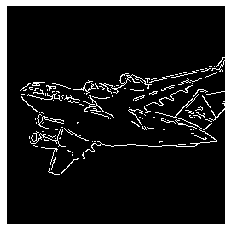

In [110]:
# 加载库
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 以灰度图格式加载图像
image_gray = cv2.imread("images/plane_256x256.jpg",cv2.IMREAD_GRAYSCALE)

# 计算像素中的中位数
median_intensity = np.median(image_gray)

# 设置阈值
lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))
upper_threshold = int(min(255, (1.0 + 0.33) * median_intensity))

# 应用Canny边缘检测器
image_canny = cv2.Canny(image_gray, lower_threshold, upper_threshold)

# 显示图像
plt.imshow(image_canny, cmap="gray"), plt.axis("off")
plt.show()

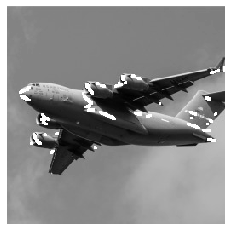

In [117]:
# 加载库
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 以灰度图模式加载图像
image_bgr = cv2.imread("images/plane_256x256.jpg")
image_gray = cv2.cvtColor(image_bgr,cv2.COLOR_BGR2GRAY)
image_gray = np.float32(image_gray)

# 设置角点检测器的参数
block_size = 2
aperture = 29
free_parameter = 0.04

# 检测角点
detector_responses = cv2.cornerHarris(image_gray,
                                      block_size,
                                      aperture,
                                      free_parameter)

# 放大角点标志
detector_responses = cv2.dilate(detector_responses, None)

# 只保留大于阈值的检测结果，并把他们标记成白色
threshold = 0.02
image_bgr[detector_responses > threshold * detector_responses.max()] = [255, 255, 255]

# 转换成灰度图
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

# 显示图像
plt.imshow(image_gray, cmap="gray"), plt.axis("off")
plt.show()

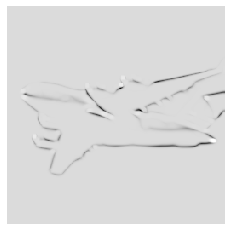

In [118]:
# 显示可能的角点
plt.imshow(detector_responses, cmap="gray"), plt.axis("off")
plt.show()

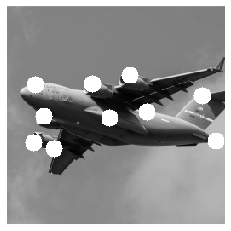

In [121]:
# 以灰度图模式加载图像
image_bgr = cv2.imread("images/plane_256x256.jpg")
image_gray = cv2.cvtColor(image_bgr,cv2.COLOR_BGR2GRAY)

# 设置角点检测器的参数
corners_to_detect = 10
minimum_quality_score = 0.05
minimum_distance = 25

# 检测角点
corners = cv2.goodFeaturesToTrack(image_gray,
                                 corners_to_detect,
                                 minimum_quality_score,
                                 minimum_distance)

corners= np.float32(corners)

# 在每个角点上画白圈
for corner in corners:
    x, y = corner[0]
    cv2.circle(image_bgr, (x,y), 10, (255,255,255), -1)


# 转换成灰度图
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

# 显示图像
plt.imshow(image_rgb, cmap="gray"), plt.axis("off")
plt.show()

In [122]:
# 加载库
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread("images/plane_256x256.jpg",cv2.IMREAD_GRAYSCALE)

image_10x10 = cv2.resize(image, (10,10))

image_10x10.flatten()

array([133, 130, 130, 129, 130, 129, 129, 128, 128, 127, 135, 131, 131,
       131, 130, 130, 129, 128, 128, 128, 134, 132, 131, 131, 130, 129,
       129, 128, 130, 133, 132, 158, 130, 133, 130,  46,  97,  26, 132,
       143, 141,  36,  54,  91,   9,   9,  49, 144, 179,  41, 142,  95,
        32,  36,  29,  43, 113, 141, 179, 187, 141, 124,  26,  25, 132,
       135, 151, 175, 174, 184, 143, 151,  38, 133, 134, 139, 174, 177,
       169, 174, 155, 141, 135, 137, 137, 152, 169, 168, 168, 179, 152,
       139, 136, 135, 137, 143, 159, 166, 171, 175], dtype=uint8)

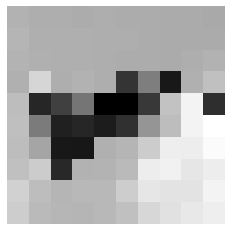

In [124]:
plt.imshow(image_10x10, cmap="gray"), plt.axis("off")
plt.show()

In [125]:
image_10x10.shape

(10, 10)

In [126]:
image_10x10.flatten().shape

(100,)

In [131]:
image_color = cv2.imread("images/plane_256x256.jpg",cv2.IMREAD_COLOR)
image_color_10x10 = cv2.resize(image_color,(10,10))
image_color_10x10.flatten().shape

(300,)

In [133]:
image_256x256_gray = cv2.imread("images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)
image_256x256_gray.flatten().shape
image_256x256_color = cv2.imread("images/plane_256x256.jpg",cv2.IMREAD_COLOR)
image_256x256_color.flatten().shape

(196608,)

In [135]:
# 加载库
import cv2
import numpy as np
from matplotlib import pyplot as plt

image_bgr = cv2.imread("images/plane_256x256.jpg",cv2.IMREAD_COLOR)

channels = cv2.mean(image_bgr)

observation = np.array([(channels[2],channels[1],channels[0])])

observation

array([[ 90.52377319, 133.11940002, 169.02355957]])

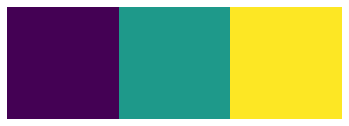

In [136]:
plt.imshow(observation), plt.axis("off")
plt.show()

In [138]:
# 加载库
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 加载图像
image_bgr = cv2.imread("images/plane_256x256.jpg",cv2.IMREAD_COLOR)

# 将图像转换成RGB格式
image_rgb = cv2.cvtColor(image_bgr,cv2.COLOR_BGR2RGB)

# 创建一个特征列表
features = []

# 为每一个颜色通道计算直方图
colors = ("r","g","b")

# 为每一个通道计算直方图并把它加入特征列表中
for i, channel in enumerate(colors):
    histogram = cv2.calcHist([image_rgb], #图像
                            [i], #颜色通道的序号
                            None, #不使用掩模
                            [256], #直方图尺寸
                            [0,256]) #范围
    features.extend(histogram)

# 将样本的特征值展开成一维数组
observation = np.array(features).flatten()

# 显示样本的前5个特征值
observation[0:5]    

array([1027.,  217.,  182.,  146.,  146.], dtype=float32)

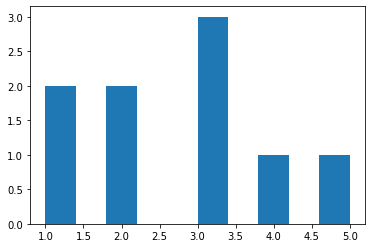

In [141]:
# 显示RGB通道的值
image_rgb[0,0]

# 导入pandas
import pandas as pd

data = pd.Series([1,1,2,2,3,3,3,4,5])

data.hist(grid=False)
plt.show()

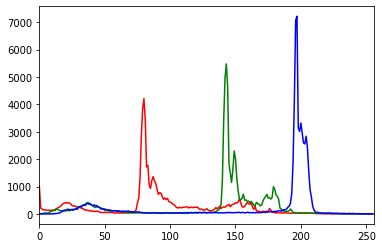

In [142]:
# 计算每个颜色通道的直方图
colors = ("r","g","b")

# 对每个通道绘制直方图
for i, channel in enumerate(colors):
    histogram = cv2.calcHist([image_rgb],
                            [i],
                            None,
                            [256],
                            [0,256])
    plt.plot(histogram,color=channel)
    plt.xlim([0,256])

plt.show()